In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [27]:
X_train.shape

(770, 1672)

In [28]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [29]:
X_trainC, X_testC, y_trainC, y_testC= X_train, X_test, y_train, y_test

## SVM without PCA

In [30]:
accuracy_score(y_test, y_pred)

0.9606060606060606

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       160
           1       0.98      0.95      0.96       170

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [33]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## SVM with PCA

In [34]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [35]:
# print the PCA components
print(pca.fit(X_train))

PCA(n_components=100)


In [36]:
# print the PCA transformation matrix
print(pca.components_.shape)
print(pca.components_)

(100, 1672)
[[ 7.02376059e-02  4.52690027e-02  7.21263867e-02 ...  5.38343207e-03
   0.00000000e+00  0.00000000e+00]
 [-3.51253741e-03 -3.57030822e-04 -3.54753127e-05 ... -5.30364401e-04
  -0.00000000e+00 -0.00000000e+00]
 [-2.85603342e-02  8.19791541e-03 -2.31834728e-02 ... -2.99109175e-03
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-2.10217241e-03  1.02389411e-02 -2.99177142e-02 ...  2.98672292e-02
   0.00000000e+00  0.00000000e+00]
 [-1.73269856e-02 -1.49863205e-02 -2.18372306e-02 ...  2.36601922e-02
  -0.00000000e+00 -0.00000000e+00]
 [ 2.49400304e-02 -8.37008302e-03 -3.22937212e-02 ...  9.34272398e-03
  -0.00000000e+00 -0.00000000e+00]]


In [37]:
# print the shape of the data before and after PCA
print(X_train.shape)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(770, 1672)
(770, 100)


In [38]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=47)

In [40]:
y_pred_pca = svm.predict(X_test_pca)

accuracy_score(y_test,y_pred_pca)

0.9393939393939394

<Axes: >

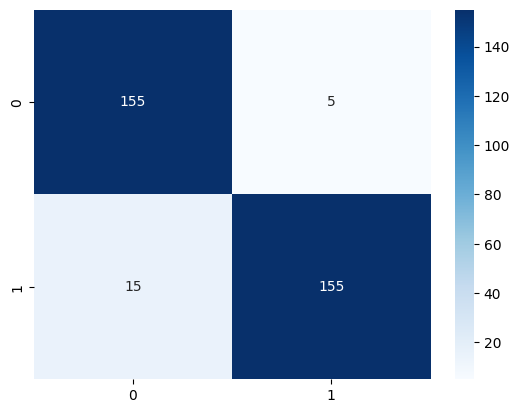

In [41]:
## make a heat map of the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


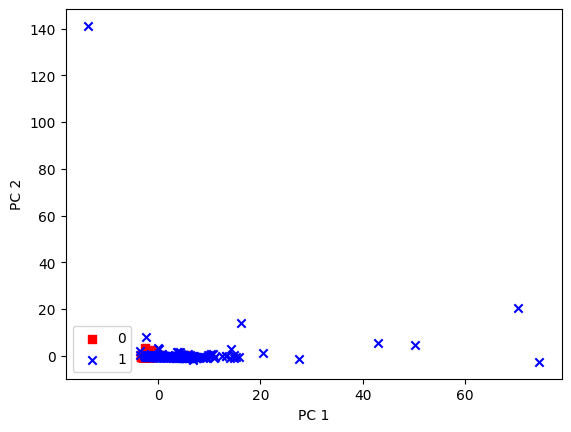

In [42]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [44]:
# lr for classification:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

NameError: name 'X_train_std' is not defined

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

NameError: name 'lr' is not defined